<a href="https://colab.research.google.com/github/ZnattapolZ/Enhancing-The-Visualization-of-Latent-Fingerprint/blob/main/%5BNFIQ%202.0%5D%20-%20NFIQ%20Score%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization for NFIQ score 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os


In [ ]:
def extract_image_name(path_list):
  extracted_list = []
  for path in path_list:
    file_name = os.path.basename(path)
    extracted_list.append(file_name)
  return extracted_list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read CSV Then make DF

In [ ]:
BEFORE_CSV = '/content/drive/MyDrive/data_samples/synth_data_500dpi/input_test_reshape.csv'
AFTER_CSV = '/content/drive/MyDrive/data_samples/synth_data_500dpi/output_epoch9.csv'

In [ ]:
nfiq_pd_1 = pd.read_csv(BEFORE_CSV)
nfiq_pd_2 = pd.read_csv(AFTER_CSV)

In [ ]:
name_list_1 = extract_image_name(nfiq_pd_1.Filename)
name_list_2 = extract_image_name(nfiq_pd_2.Filename)

In [ ]:
nfiq_pd_1['Name'] = name_list_1
nfiq_pd_2['Name'] = name_list_2

In [ ]:
nfiq_pd = pd.concat([nfiq_pd_1['Name'], nfiq_pd_1['QualityScore'], nfiq_pd_2['QualityScore']], axis=1, keys=['Name', 'QBefore', 'QAfter'])

In [ ]:
nfiq_pd_merge = pd.merge(nfiq_pd_1, nfiq_pd_2, 'left', on=['Name'])
nfiq_pd_merge

,Filename_x,FingerCode_x,QualityScore_x,OptionalError_x,Quantized_x,Resampled_x,Name,Filename_y,FingerCode_y,QualityScore_y,OptionalError_y,Quantized_y,Resampled_y
0,E:\nfiq2_exe\images\input_test_reshape/10000.png,0,38,NaN,0,0,10000.png,E:\nfiq2_exe\images\output_9/10000.png,0,64,NaN,0,0
1,E:\nfiq2_exe\images\input_test_reshape/8001.png,0,41,NaN,0,0,8001.png,E:\nfiq2_exe\images\output_9/8001.png,0,62,NaN,0,0
2,E:\nfiq2_exe\images\input_test_reshape/8002.png,0,48,NaN,0,0,8002.png,E:\nfiq2_exe\images\output_9/8002.png,0,58,NaN,0,0
3,E:\nfiq2_exe\images\input_test_reshape/8003.png,0,43,NaN,0,0,8003.png,E:\nfiq2_exe\images\output_9/8003.png,0,64,NaN,0,0
4,E:\nfiq2_exe\images\input_test_reshape/8004.png,0,44,NaN,0,0,8004.png,E:\nfiq2_exe\images\output_9/8004.png,0,60,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,E:\nfiq2_exe\images\input_test_reshape/9995.png,0,43,NaN,0,0,9995.png,E:\nfiq2_exe\images\output_9/9995.png,0,63,NaN,0,0
1996,E:\nfiq2_exe\images\input_test_reshape/9996.png,0,43,NaN,0,0,9996.png,E:\nfiq2_exe\images\output_9/9996.png,0,55,NaN,0,0
1997,E:\nfiq2_exe\images\input_test_reshape/9997.png,0,45,NaN,0,0,9997.png,E:\nfiq2_exe\images\output_9/9997.png,0,50,NaN,0,0
1998,E:\nfiq2_exe\images\input_test_reshape/9998.png,0,56,NaN,0,0,9998.png,E:\nfiq2_exe\images\output_9/9998.png,0,62,NaN,0,0


In [ ]:
nfiq_pd_merged_dic = {
    "Name": nfiq_pd_merge.Name,
    "QBefore": nfiq_pd_merge.QualityScore_x,
    "QAfter": nfiq_pd_merge.QualityScore_y
}
nfiq_pd = pd.DataFrame(data=nfiq_pd_merged_dic) 

In [ ]:
nfiq_pd

,Name,QBefore,QAfter
0,10000.png,38,64
1,8001.png,41,62
2,8002.png,48,58
3,8003.png,43,64
4,8004.png,44,60
...,...,...,...
1995,9995.png,43,63
1996,9996.png,43,55
1997,9997.png,45,50
1998,9998.png,56,62


In [ ]:
global_min = min(min(nfiq_pd['QBefore']), min(nfiq_pd['QAfter']))
global_max = max(max(nfiq_pd['QBefore']), max(nfiq_pd['QAfter']))

print(global_min)
print(global_max)

21
73


# Visualization

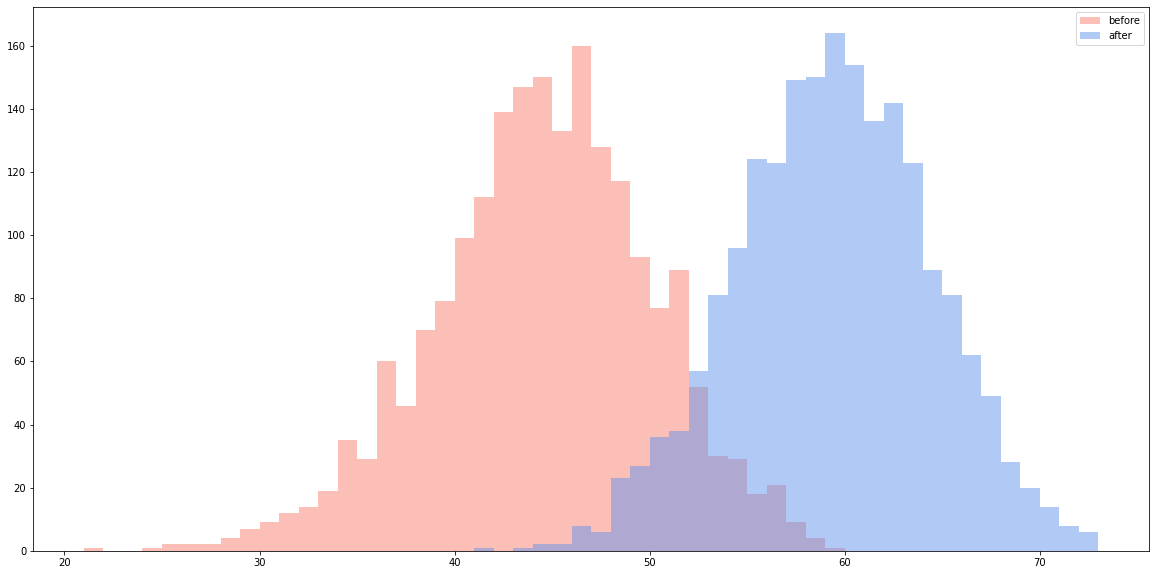

In [ ]:
bins = np.linspace(global_min, global_max, global_max - global_min+1)

plt.figure(figsize=(20,10))
plt.hist(nfiq_pd['QBefore'], bins=bins, alpha=0.5, label='before', color='salmon')
plt.hist(nfiq_pd['QAfter'], bins=bins, alpha=0.5, label='after', color='cornflowerblue')
plt.legend(loc='upper right')
plt.show()

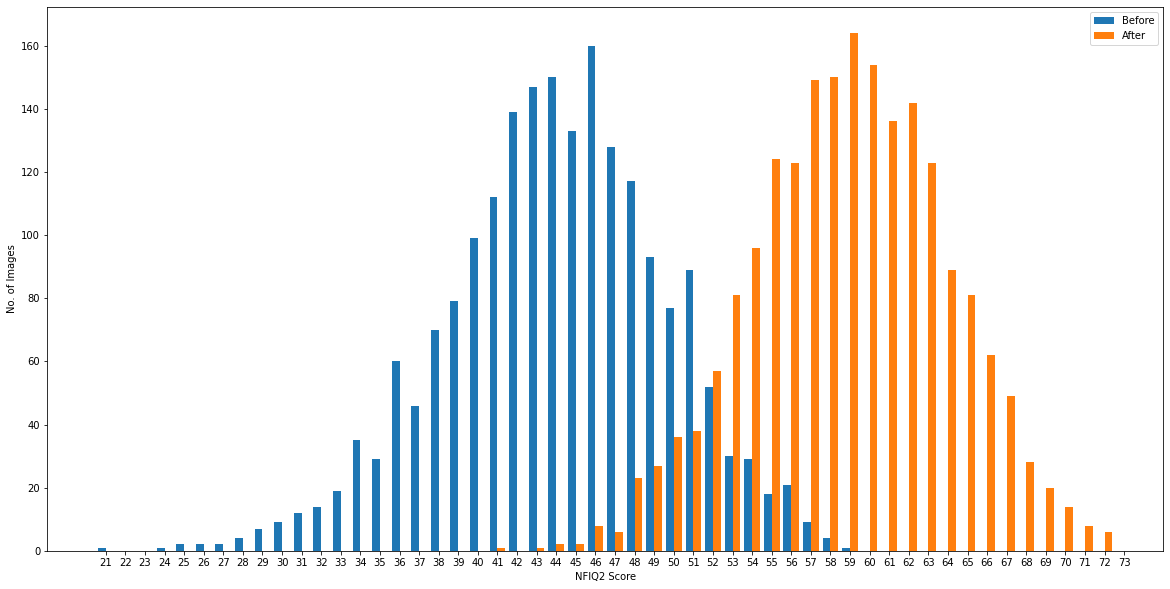

In [ ]:
bins = np.linspace(global_min, global_max, global_max - global_min+1)

plt.figure(figsize=(20,10))
plt.hist([nfiq_pd['QBefore'],nfiq_pd['QAfter']], bins=bins, rwidth=0.8, align='left')
plt.legend(["Before", "After"], loc='upper right')
plt.xticks(bins)
plt.ylabel("No. of Images")
plt.xlabel("NFIQ2 Score")
plt.show()

In [ ]:
print("Mean of Before: ", nfiq_pd['QBefore'].mean())
print("Median of Before: ", nfiq_pd['QBefore'].median())

Mean of Before:  44.0525
Median of Before:  44.0


# Hypotesis Tests



## Kolmogorov Smirnov Normality Test 


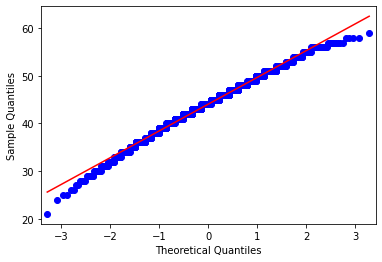

(<Figure size 432x288 with 1 Axes>, None)

In [ ]:
from statsmodels.graphics.gofplots import qqplot
data = nfiq_pd['QBefore']
qqplot(data, line='s'), plt.show()

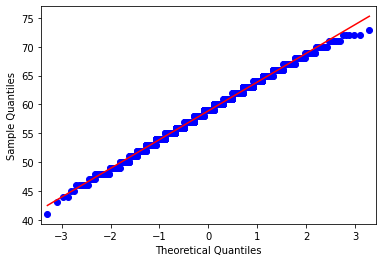

(<Figure size 432x288 with 1 Axes>, None)

In [ ]:
data_after = nfiq_pd['QAfter']
qqplot(data_after, line='s'), plt.show()

In [ ]:
from scipy.stats import kstest

data = nfiq_pd['QBefore'].tolist()
stat, p = kstest(data,'norm', N = 2000)
if p <= 0.05:
  print("Not Normal Distribution")
else:
  print("Normal Distribution")

print('stat = ', stat)
print('p value = ', p)

Not Normal Distribution
stat =  1.0
p value =  0.0


In [ ]:
from scipy.stats import anderson
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.532
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


In [ ]:
from scipy.stats import ttest_rel

# Python paired sample t-test
pair_t_test_result = ttest_rel(data, data_after)
pair_t_test_result


Ttest_relResult(statistic=-90.62672428814987, pvalue=0.0)

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
wilcoxon(nfiq_pd['QBefore'], nfiq_pd['QAfter'])

WilcoxonResult(statistic=2640.5, pvalue=0.0)

Null hypothesis (H0): The difference between the pairs follows a symmetric distribution around zero.<br>
Alternative hypothesis (HA): The difference between the pairs does not follow a symmetric distribution around zero. (median between 2 group is shifted )

In [ ]:
from scipy.stats import wilcoxon
print(wilcoxon(nfiq_pd['QBefore'], nfiq_pd['QAfter']))

print("              BEFORE       AFTER")
print(" MEAN :       %.2f        %.2f" % (nfiq_pd['QBefore'].mean(), nfiq_pd['QAfter'].mean()))
print(" MED  :       %.2f        %.2f" % (nfiq_pd['QBefore'].median(), nfiq_pd['QAfter'].median()))
print(" VAR  :       %.2f        %.2f" % (nfiq_pd['QBefore'].var(), nfiq_pd['QAfter'].var()))

WilcoxonResult(statistic=2640.5, pvalue=0.0)
              BEFORE       AFTER
 MEAN :       44.05        58.89
 MED  :       44.00        59.00
 VAR  :       31.49        24.92
